In [29]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2665 - acc: 0.9212
Epoch 2/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1087 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0738 - acc: 0.9770


In [32]:
val_loss, val_acc = model.evaluate(x_train, y_train)
print(val_loss, val_acc)

60000/60000 [==============================] - 1s 24us/sample - loss: 0.0462 - acc: 0.9856
0.0462149295070519 0.9856


In [43]:
model.save('first_model_mnist')

In [45]:
new_model = tf.keras.models.load_model('first_model_mnist')

In [50]:
predictions = new_model.predict(x_test)

In [51]:
print(predictions)

[[7.4363813e-09 4.3344041e-08 7.8751225e-07 ... 9.9995160e-01
  9.3811758e-09 3.6585024e-07]
 [5.7784293e-09 6.0493612e-06 9.9999368e-01 ... 1.3423139e-11
  9.1335517e-09 7.4158713e-13]
 [5.0776282e-07 9.9876142e-01 4.8236408e-05 ... 2.2553058e-05
  1.0732668e-03 9.0032645e-06]
 ...
 [6.0548538e-10 6.2956769e-07 6.3349660e-08 ... 1.1995611e-05
  2.4533633e-06 7.6223921e-05]
 [5.8855488e-07 2.3793784e-07 5.7024073e-07 ... 9.0455791e-07
  1.4278375e-03 2.3375966e-08]
 [1.4434131e-07 2.2133433e-08 2.2055397e-07 ... 1.9783493e-11
  9.8734532e-09 1.4265772e-08]]


In [65]:
import numpy as np
print(np.argmax(predictions[9]))

9


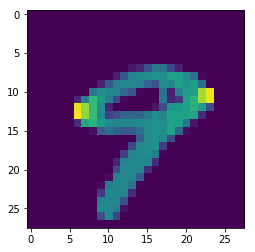

In [66]:
import matplotlib.pyplot as plt

print(x_train[0])
plt.imshow(x_train[3], cmap=plt.cm.binary)

plt.imshow(x_test[9])
plt.show()